In [1]:
# Initialization
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../')
from ex1.featureNormalize import featureNormalize
from ex1.gradientDescentMulti import gradientDescentMulti
from ex1.normalEqn import normalEqn

In [2]:
# ================ Part 1: Feature Normalization ================
print('Loading data ...')

# Load Data
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, 2]).reshape(-1, 1)
m = len(y)
# Print out some data points
print('First 10 examples from the dataset: ')
data.head(10)

Loading data ...
First 10 examples from the dataset: 


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
# Scale features and set them to zero mean
print('Normalizing Features ...')

X, mu, sigma = featureNormalize(X)
# 提示，由于numpy提供的标准差精度很高，答案会与MATLAB稍有差别
# sigma为    [7.86202619e+02 7.52842809e-01]
# MATLAB下为  [794.702354 0.760982]

# Add intercept term to X
X = np.insert(X, 0, np.ones(m), axis=1)

Normalizing Features ...


Running gradient descent ...
图像自己比对pdf
Theta computed from gradient descent: 
[[334302.06399328  99411.44947359   3267.01285407]]

MATLAB下为
334302.063993
100087.116006
3673.548451
由于精度差异，误差不大即可
鄙人的答案是
[[334302.06399328  99411.44947359   3267.01285407]]
 


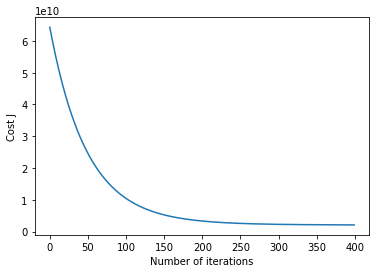

In [4]:
"""
%% ================ Part 2: Gradient Descent ================

% ====================== YOUR CODE HERE ======================
% Instructions: We have provided you with the following starter
%               code that runs gradient descent with a particular
%               learning rate (alpha). 
%
%               Your task is to first make sure that your functions - 
%               computeCost and gradientDescent already work with 
%               this starter code and support multiple variables.
%
%               After that, try running gradient descent with 
%               different values of alpha and see which one gives
%               you the best result.
%
%               Finally, you should complete the code at the end
%               to predict the price of a 1650 sq-ft, 3 br house.
%
%
% Hint: At prediction, make sure you do the same feature normalization.
%
"""
print('Running gradient descent ...\n图像自己比对pdf')
# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(theta)
print('''
MATLAB下为
334302.063993
100087.116006
3673.548451
由于精度差异，误差不大即可
鄙人的答案是
[[334302.06399328  99411.44947359   3267.01285407]]
 ''')

In [5]:
"""
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.
"""

price = 0  # You should change this
pass
# mydata = (np.array([[1650, 3]]) - mu) / sigma
# mydata = mydata.T
# mydata = np.insert(mydata, 0, np.ones(1)).reshape(1, -1)
# print(mydata)
# price = mydata @ theta.T
# ========== END ==========
print()
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $ %f' % price)
print()
print('MATLAB下为$281100.583639\n鄙人的答案是289221.54737122')

[[ 1.         -0.44604386 -0.22609337]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $ 289221.547371

MATLAB下为$281100.583639
鄙人的答案是289221.54737122


In [6]:
print('Solving with normal equations...\n')
"""
% ====================== YOUR CODE HERE ======================
% Instructions: The following code computes the closed form 
%               solution for linear regression using the normal
%               equations. You should complete the code in 
%               normalEqn.m
%
%               After doing so, you should complete this code 
%               to predict the price of a 1650 sq-ft, 3 br house.
%
"""
# Load Data
data = pd.read_csv('ex1data2.txt')
X = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, 2]).reshape(-1, 1)
m = len(y)

# Add intercept term to X
X = np.insert(X, 0, np.ones(m), axis=1)

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: \n')
print(theta)
print()

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
price = 0  # You should change this
pass
# price = np.array([[1, 1650, 3]]) @ theta
# ========== END ==========
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $ %f' % price)
print()
print('MATLAB答案为 293081.464335')
print('鄙人的答案为  292195.800951')

Solving with normal equations...

Theta computed from the normal equations: 

[[87807.75019324]
 [  138.75587842]
 [-8186.38287595]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $ 292195.800951

MATLAB答案为 293081.464335
鄙人的答案为  292195.800951
